In [1]:
import pandas as pd
import numpy as np

<br><br>
# Problem 1 - Perform a classification task with knn from scratch

## Load the Dataset:

In [3]:
# Loading the dataset
df = pd.read_csv("diabetes.csv")

# Understanding the dataset
# Show first rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Performing EDA

In [4]:
# Checking dataset info
df.info()

# Summary
df.describe()

# Checking Missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handle Missing data:

In [6]:
# Replacing missing data since there are not any null values but some data are encoded as 0 which is impossible

# Taking potential columns where 0 is not possible
col_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df_clean = df.copy()

#Replacing the 0s with null first then filling them with median using .fillna()
for col in col_with_zeros:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

## Feature Engineering

In [7]:
feature_matrix_X = df_clean.drop(columns=["Outcome"]).values
target_Y = df_clean["Outcome"].values

# Shuffling the indexes for selecting random data for training and testing
indices = np.arange(len(feature_matrix_X))
np.random.shuffle(indices)

# Splitting the dataset for training and testing
split_size = int(0.7 * len(feature_matrix_X))

train_indices = indices[:split_size]
test_indices = indices[split_size:]

x_train, x_test = feature_matrix_X[train_indices], feature_matrix_X[test_indices]
y_train, y_test = target_Y[train_indices], target_Y[test_indices]

## Implement kNN:

### Distance function using Euclidean distance

In [8]:
def euclidean_distance(a, b):
    """
    Calculates the Euclidean distance between two points in n-dimensional space.

    Arguments:
    a: np.ndarray
        The first point as a numpy array.
    b: np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.
    """

    # Calculating the Euclidean distance
    distance = np.sqrt(np.sum((a - b)**2, axis=1))
    return distance

### Predicting the class for a single query

In [9]:
def predict_single(x, x_train, y_train, k = 3):
    """
    Predicts the class label of a single query using k-NN algorithm.

    Arguments:
    x: np.ndarray
        The query point for which the prediction is to be made.
    x_train: np.ndarray
        The training feature matrix.
    y_train: np.ndarray
        The training labels.
    k: int
        The number of nearest neighbors to consider (default = 3).

    Returns:
    int
        The predicted class label for the query.
    """

    # Get all the distances to all the training samples
    distances = euclidean_distance(x_train, x)

    sorted_indices = distances.argsort()[:k]
    sorted_labels = y_train[sorted_indices]

    prediction = np.bincount(sorted_labels).argmax()
    return prediction

### Predicting classes for all test samples

In [10]:
def predict_all(x_test, x_train, y_train, k = 3):
    """
    Predicts the class labels for all test samples using k-NN algorithm.

    Arguments:
    x_test: np.ndarray
        The test feature matrix.
    x_train: np.ndarray
        The training feature matrix.
    y_train: np.ndarray
        The training labels.
    k: int
        The number of nearest neighbors to consider (default = 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [predict_single(x, x_train, y_train, k) for x in x_test]
    return np.array(predictions)

### Evaluating performance using accuracy

In [11]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculates the accuracy of predictions.

    Arguemnts:
    y_true: np.ndarray
        The true labels.
    y_pred: np.ndarray
        The predicted labels.

    Returns:
    float:
        The accuracy as percentage.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = (correct_predictions / total) * 100
    return accuracy

### Testing

In [12]:
pred = predict_all(x_test, x_train, y_train, 3)
accuracy = calculate_accuracy(y_test, pred)
print(f"Accuracy= {accuracy:.2f}%")

Accuracy= 71.43%


<br><br>
# Problem 2: Experimentation:

## Scaling

In [13]:
# Scaling
means = x_train.mean(axis = 0)
stds = x_train.std(axis = 0)
stds[stds == 0] = 1 # Avoiding division by 0.

# Scaled data training and testing sets
x_train_scaled = (x_train - means) / stds
x_test_scaled = (x_test - means) / stds

### Using Scaled Data:

In [14]:
scaled_pred = predict_all(x_test_scaled, x_train_scaled, y_train, 3)
scaled_accuracy = calculate_accuracy(y_test, scaled_pred)
print(f"Scaled accuracy= {scaled_accuracy:.2f}%")

Scaled accuracy= 68.83%


## Comparative Analysis:

Accuracy without scaling : 74.89% <br>
Accuracy with scaling: 80.09%

Scaling impacted the k-NN performance by balancing and giving more classification. <br>
This is because k-NN is a distance based algorithm which means if there is a feature with larger numeric range then it dominates the distance even if it might not be important.

<br><br>
# Problem 3: Experimentation with k:

In [15]:
import time
import matplotlib.pyplot as plt

## Varying the number of neighbors - k:

In [16]:
original_accuracies = []
scaled_accuracies = []

original_time = []
scaled_time = []

k_values = range(1,16)

for k in k_values:
    # For original dataset
    start_time = time.time()
    original_pred = predict_all(x_test, x_train, y_train, k)
    end_time = time.time()

    original_accuracy = calculate_accuracy(y_test, original_pred)
    original_accuracies.append(original_accuracy)
    original_time.append(end_time - start_time)

    # For scaled dataset
    start_time = time.time()
    scaled_pred = predict_all(x_test_scaled, x_train_scaled, y_train, k)
    end_time = time.time()

    scaled_accuracy = calculate_accuracy(y_test, scaled_pred)
    scaled_accuracies.append(scaled_accuracy)
    scaled_time.append(end_time - start_time)

## Visualizing the Results:

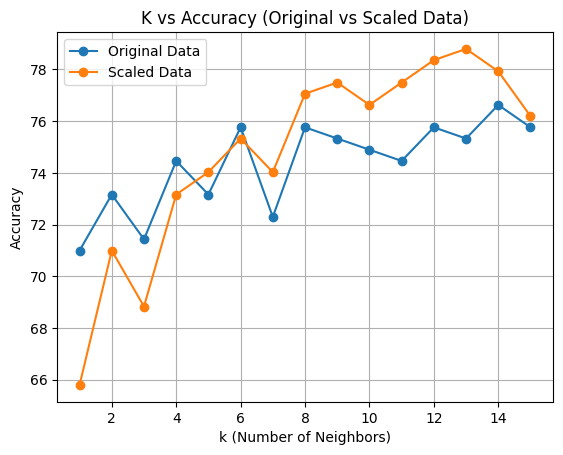

In [17]:
plt.plot(k_values, original_accuracies, marker='o', label='Original Data')
plt.plot(k_values, scaled_accuracies, marker='o', label='Scaled Data')

plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy (Original vs Scaled Data)")
plt.grid(True)
plt.legend()
plt.show()

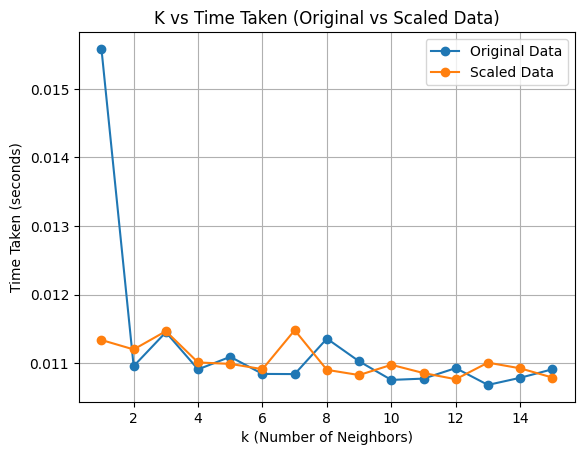

In [18]:
plt.plot(k_values, original_time, marker='o', label='Original Data')
plt.plot(k_values, scaled_time, marker='o', label='Scaled Data')

plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("K vs Time Taken (Original vs Scaled Data)")
plt.grid(True)
plt.legend()
plt.show()

## Analysis

The choice of k affects the accuracy as small k value makes the model overfitting and sensitive to noise while large k value makes the model underfitting and drops in accuracy. So, it is crucial for selecting optimal k value which often gives the best accuracy.
The choice of k does not significantly affect computational cost as k is used only for selecting/sorting while calculating the distance takes the most computational cost.

Based on my analysis: The optimal value of k is 5.

<br><br>
# Problem 4 - Additional Questions

### Challenges of using k-NN for large datasets and high-dimensional data are;

High computation cost:
    For every test sample, it calculates the distance between the test sample and all the training samples and sort them.
High Memory Usages:
    k-NN stores the enite training dataset in the memory rather than learning a model which means for large datasets the memory requirement would also be high.
Dimensionality:
    In high dimensional data, the distance between the points become meaningless and unreliable.
Sensitive to scaling:
    Features with large numeric ranges dominates the distance calculation even if its not important.